<div class = "alert alert-block alert-info">
    
## DATA 601 - FALL 2025
### PROJECT 2 - Data Cleaning
### NAME: LAURA HAHN
### DATE: 12/8/2025

</div>

### Data Loading Exploration
1. As part of the data cleaning you will need to explore the data. 
2. At a minimum you will need to calculate the number of rows, number of columns, and information of the dataframe.
3. At minimum you need to use the .info(), .hist() and sns.pairplot() functions.
4. At any point after making changes during the data cleaning you may use the .info() or any other functions.
5. Document any observations regarding any potential data cleaning.
6. Also discuss datatypes given the col description and if it each column datatype makes sense and make changes as appropriate. Identify any potential outliers, and any correlation between features. Identify plots that may be worth exploring during the EDA

In [1]:
#Import necessary modules for exploration
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st

In [2]:
#Loading dataset
df_telemed = pd.read_csv('./input_data/TMEDTREND_PUBLIC_250827.csv')

In [3]:
df_telemed.shape
#Observation: The dataset has 13 columns and 31304 rows

(31304, 13)

In [4]:
df_telemed.head(10)
#Observations:
##The dataset includes telehealth claims data for Medicare beneficiaries starting in 2020
##It has a hierarchy of how each row of the data is grouped:
##1. First grouped by year
##2. Then Rural, Urban, Unknown breakdwon
##3. Then Age breakdown (0-64, 65-74, 75-84, 85+)
##4. Then Entitlement Status (Aged, Disabled, ESRD)
##5. Then Sex (Female, Male)
##6. Then Race
##7. Then State

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
0,2020,Overall,National,All,All,All,All,All,All,30946785.0,3.224489e+07,14826919.0,0.4791
1,2020,Overall,National,All,All,All,All,All,Rural,7182616.0,7.493527e+06,2859483.0,0.3981
2,2020,Overall,National,All,All,All,All,All,Urban,23699049.0,2.463142e+07,11945312.0,0.5040
3,2020,Overall,National,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
4,2020,Overall,National,All,All,All,All,0-64,All,4088345.0,4.291403e+06,2322324.0,0.5680
5,2020,Overall,National,All,All,All,All,65-74,All,14440791.0,1.532671e+07,6495728.0,0.4498
6,2020,Overall,National,All,All,All,All,75-84,All,8507543.0,8.770470e+06,4133907.0,0.4859
7,2020,Overall,National,All,All,All,All,85 and over,All,3910106.0,3.856306e+06,1874960.0,0.4795
8,2020,Overall,National,All,All,All,Aged,All,All,26643001.0,2.776232e+07,12371786.0,0.4644
9,2020,Overall,National,All,All,All,Disabled,All,All,3869764.0,4.092286e+06,2192809.0,0.5667


In [5]:
df_telemed.tail(10)
#Observations:
##The dataset includes claims through the first quarter of 2025

,Year,quarter,Bene_Geo_Desc,Bene_Mdcd_Mdcr_Enrl_Stus,Bene_Race_Desc,Bene_Sex_Desc,Bene_Mdcr_Entlmt_Stus,Bene_Age_Desc,Bene_RUCA_Desc,Total_Bene_TH_Elig,Total_PartB_Enrl,Total_Bene_Telehealth,Pct_Telehealth
31294,2025,1,South Dakota,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
31295,2025,1,Tennessee,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
31296,2025,1,Texas,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
31297,2025,1,Utah,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
31298,2025,1,Vermont,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
31299,2025,1,Virginia,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
31300,2025,1,Washington,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
31301,2025,1,West Virginia,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
31302,2025,1,Wisconsin,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN
31303,2025,1,Wyoming,All,All,All,All,All,Unknown,NaN,NaN,NaN,NaN


In [6]:
df_telemed.columns

Index(['Year', 'quarter', 'Bene_Geo_Desc', 'Bene_Mdcd_Mdcr_Enrl_Stus',
       'Bene_Race_Desc', 'Bene_Sex_Desc', 'Bene_Mdcr_Entlmt_Stus',
       'Bene_Age_Desc', 'Bene_RUCA_Desc', 'Total_Bene_TH_Elig',
       'Total_PartB_Enrl', 'Total_Bene_Telehealth', 'Pct_Telehealth'],
      dtype='object')

In [7]:
df_telemed.info()
#Observations:
#Categorical variables include: 
##Geography Description, Beneficiary Medicare Enrollment Description, Beneficiary Race/ Ethnicity Description, Beneficiary Sex Description
##Beneficiary Medicare Entitlement Status, Beneficiary Age Description, Beneficiary Rural/Urban Status

#Numeric variables include:
##Total Telehealth Eligible Users, Total Medicare Part B Enrollment, Total Telehealth Users, Percentage of Medicare Users with a Telehealth Service
##'Pct_Telehealth' is the proportion of Medicare beneficiaries who were billed for a service that could be accomplished using telehealth 
# AND who actually received that service in the form of telehealth

#Due to the grouping of the data, I will need to do a lot of filtering to draw any conclusions using this variable

#The datatypes appear to be appropriate for the variables
#There are no null values for the categorial variables
#Null values are present for numeric variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31304 entries, 0 to 31303
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      31304 non-null  int64  
 1   quarter                   31304 non-null  object 
 2   Bene_Geo_Desc             31304 non-null  object 
 3   Bene_Mdcd_Mdcr_Enrl_Stus  31304 non-null  object 
 4   Bene_Race_Desc            31304 non-null  object 
 5   Bene_Sex_Desc             31304 non-null  object 
 6   Bene_Mdcr_Entlmt_Stus     31304 non-null  object 
 7   Bene_Age_Desc             31304 non-null  object 
 8   Bene_RUCA_Desc            31304 non-null  object 
 9   Total_Bene_TH_Elig        27990 non-null  float64
 10  Total_PartB_Enrl          27990 non-null  float64
 11  Total_Bene_Telehealth     27929 non-null  float64
 12  Pct_Telehealth            27927 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 3.1+ MB


In [8]:
df_telemed.value_counts('Year')

Year
2020    6020
2021    6020
2022    6020
2023    6020
2024    6020
2025    1204
Name: count, dtype: int64

In [9]:
df_telemed.isnull().sum()

Year                           0
quarter                        0
Bene_Geo_Desc                  0
Bene_Mdcd_Mdcr_Enrl_Stus       0
Bene_Race_Desc                 0
Bene_Sex_Desc                  0
Bene_Mdcr_Entlmt_Stus          0
Bene_Age_Desc                  0
Bene_RUCA_Desc                 0
Total_Bene_TH_Elig          3314
Total_PartB_Enrl            3314
Total_Bene_Telehealth       3375
Pct_Telehealth              3377
dtype: int64

In [10]:
df_telemed.groupby('Year')['Pct_Telehealth'].apply(lambda x: x.isnull().sum())

Year
2020    646
2021    640
2022    645
2023    655
2024    659
2025    132
Name: Pct_Telehealth, dtype: int64

array([[<Axes: title={'center': '2020'}>,
        <Axes: title={'center': '2021'}>],
       [<Axes: title={'center': '2022'}>,
        <Axes: title={'center': '2023'}>],
       [<Axes: title={'center': '2024'}>,
        <Axes: title={'center': '2025'}>]], dtype=object)

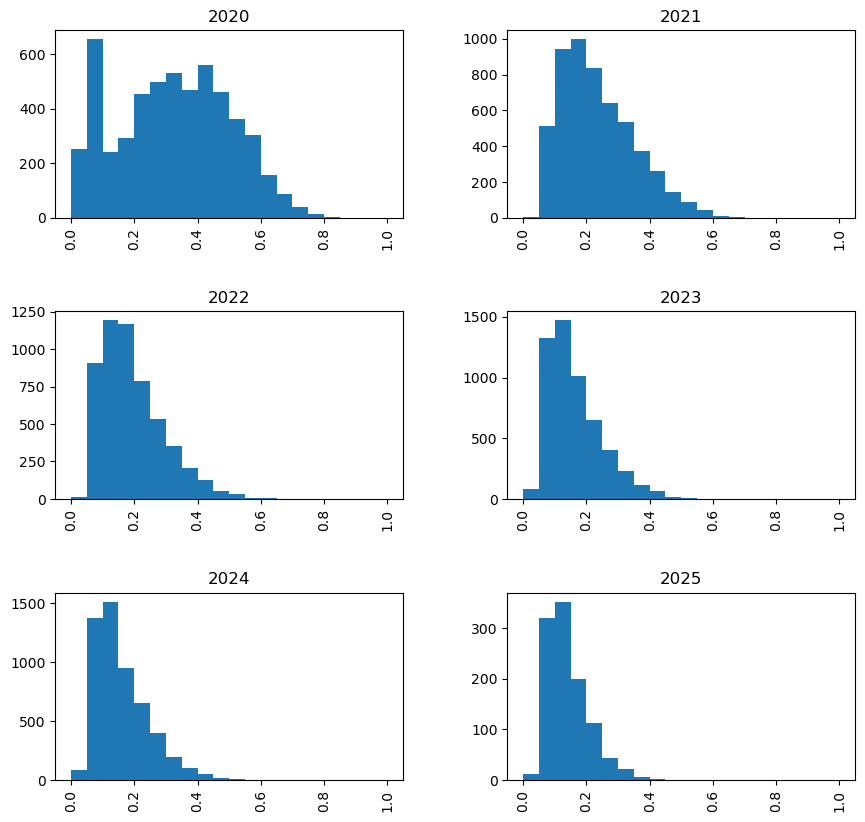

In [11]:
df_telemed.hist(column = 'Pct_Telehealth', grid = True, range = (0,1), bins = 20, by = 'Year', figsize = (10,10))
#It generally appears that the percent of Medicare beneficiaries opting for telehealth has gradually declined since 2020

### Data Statistics
1. Explore the data statistics to further identify potential outliers and if the statistics make sense.
2. At minimum you need to use the .describe(), and value_counts() functions.
3. You could also use the groupby functions.
4. Please export the .describe() dataframe and put a copy on the output_data folder.

In [12]:
#Filtering data for further exploration. 
df_telemed_maryland = df_telemed[(df_telemed['Bene_Geo_Desc'] == 'Maryland')].reset_index(drop = True)
df_telemed_national = df_telemed[(df_telemed['Bene_Geo_Desc'] == 'National')].reset_index(drop = True)

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

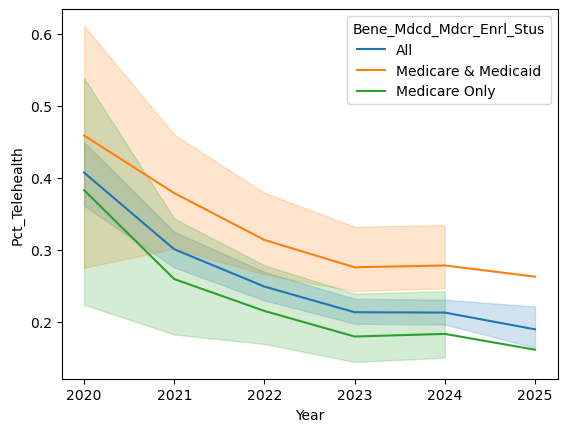

In [13]:
sns.lineplot(df_telemed_maryland, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_Mdcd_Mdcr_Enrl_Stus', legend = 'full')
#Observations
##'Dual-eligible' individuals with Medicaid/Medicare used telehealth more
##This appears to be significant association between 2023-2024

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

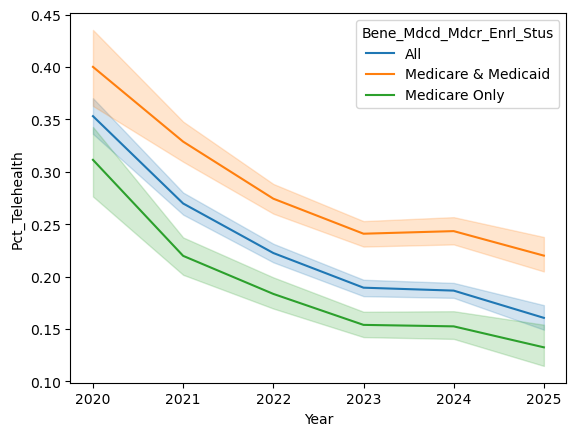

In [14]:
sns.lineplot(df_telemed_national, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_Mdcd_Mdcr_Enrl_Stus', legend = 'full')
##Observations: 
#National data mirrors trend in Maryland

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

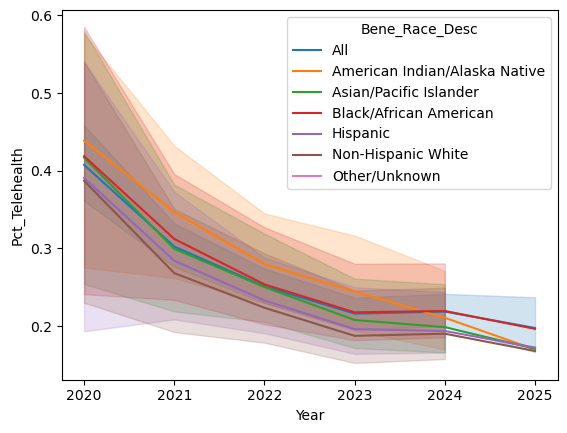

In [15]:
sns.lineplot(df_telemed_maryland, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_Race_Desc', legend = 'full')
#Observations
##American/Indian and Black beneficiaries utilized telehealth more

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

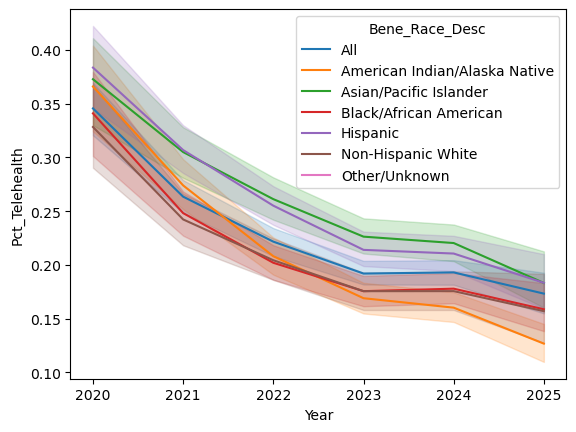

In [16]:
sns.lineplot(df_telemed_national, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_Race_Desc', legend = 'full')
#Observations:
##National data differs from Maryland data likely due to population differences in Maryland's urban communities

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

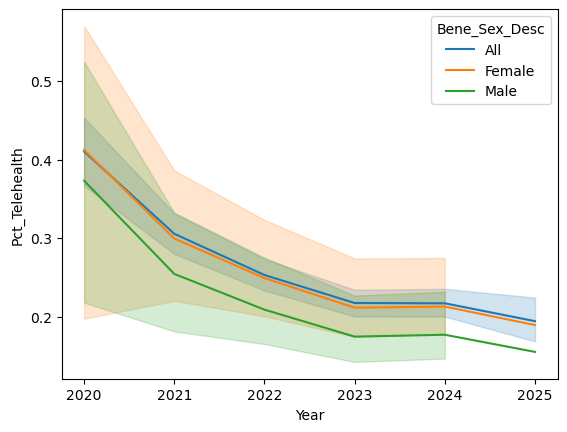

In [17]:
sns.lineplot(df_telemed_maryland, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_Sex_Desc', legend = 'full')
#Observations
##Female beneficiaries utilized telehealth more

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

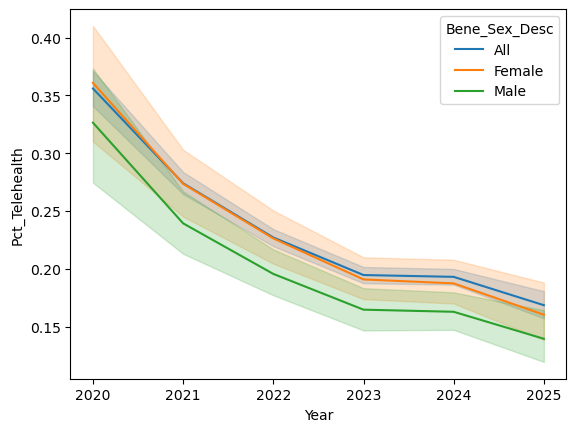

In [18]:
sns.lineplot(df_telemed_national, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_Sex_Desc', legend = 'full')
##Observations: 
#National data mirrors trend in Maryland

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

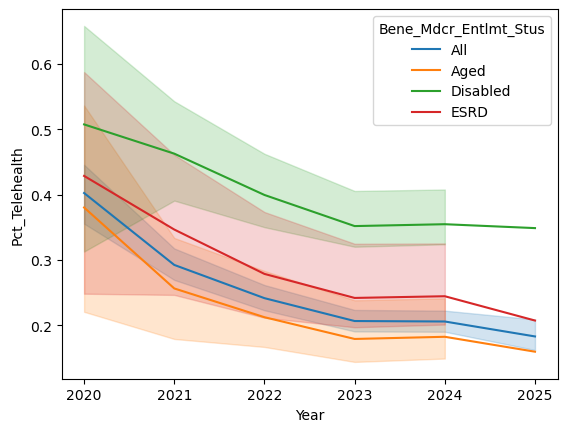

In [19]:
sns.lineplot(df_telemed_maryland, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_Mdcr_Entlmt_Stus', legend = 'full')
#Observations
##Disabled beneficiaries used telehealth more
##This appears to be significant association between 2023-2024

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

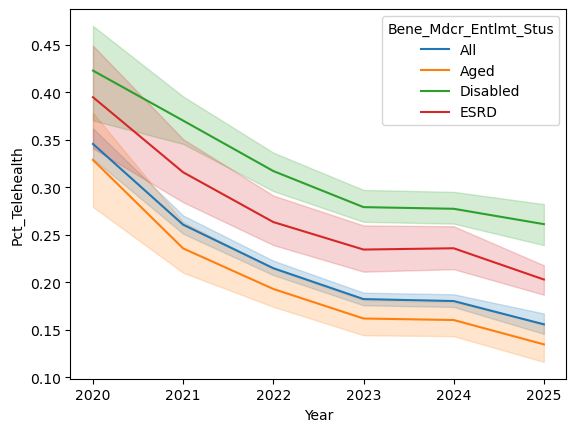

In [20]:
sns.lineplot(df_telemed_national, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_Mdcr_Entlmt_Stus', legend = 'full')
#Observations:
##National data trends similar to Maryland

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

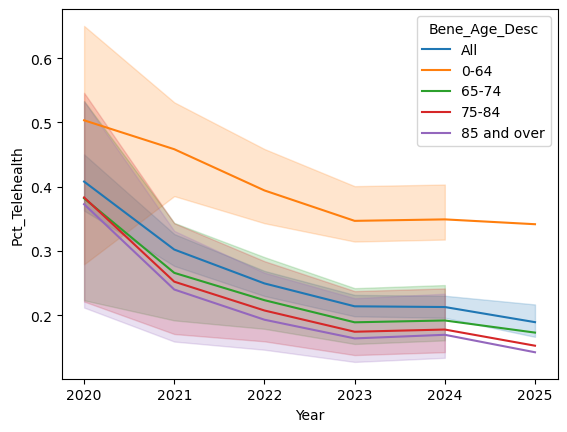

In [21]:
sns.lineplot(df_telemed_maryland, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_Age_Desc', legend = 'full')
#Observations
##Very clear association between younger age and telehealth use

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

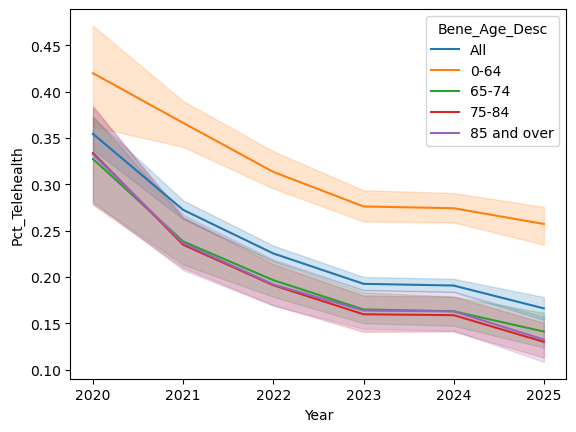

In [22]:
sns.lineplot(df_telemed_national, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_Age_Desc', legend = 'full')
#Observations:
##National data trends similar to Maryland

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

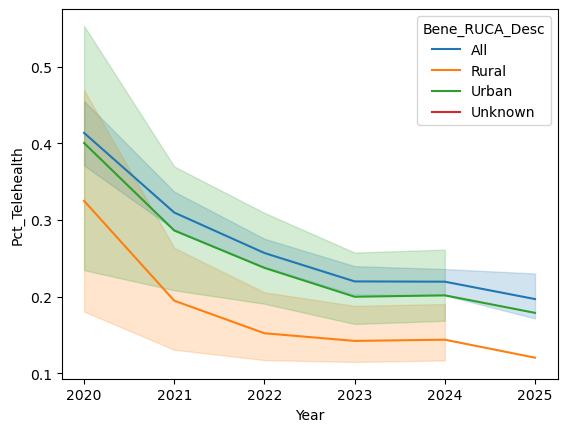

In [23]:
sns.lineplot(df_telemed_maryland, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_RUCA_Desc', legend = 'full')
#Observations
##Surprisingly, appears that beneficiaries living in rural communities used telehealth less
##Maybe less access to reliable internet service?

<Axes: xlabel='Year', ylabel='Pct_Telehealth'>

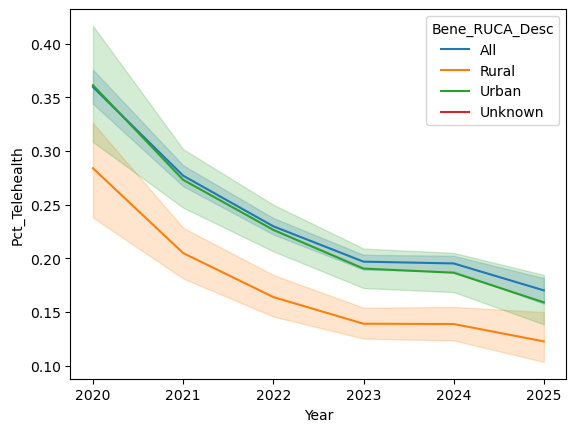

In [24]:
sns.lineplot(df_telemed_national, x = 'Year', y = 'Pct_Telehealth', hue = 'Bene_RUCA_Desc', legend = 'full')
#Observations:
##National data trends similar to Maryland

In [25]:
df_telemed_maryland_stats = df_telemed_maryland.describe(include = 'float64').T
df_telemed_maryland_stats

,count,mean,std,min,25%,50%,75%,max
Total_Bene_TH_Elig,494.0,220868.139676,207126.877223,240.0000,38430.750000,131899.00000,393244.250000,744753.00000
Total_PartB_Enrl,494.0,271360.662955,251798.400267,328.0000,46319.416667,171562.91667,478885.833330,784134.33333
Total_Bene_Telehealth,494.0,58179.710526,68903.572669,37.0000,9542.500000,34834.50000,81817.750000,440009.00000
Pct_Telehealth,494.0,0.274771,0.141078,0.0576,0.168375,0.22605,0.348125,0.69950


In [26]:
df_telemed_national_stats = df_telemed_national.describe(include = 'float64').T
df_telemed_national_stats

,count,mean,std,min,25%,50%,75%,max
Total_Bene_TH_Elig,2756.0,3.554685e+06,5.720908e+06,3356.000000,181742.75000,8.028995e+05,3.517325e+06,3.094678e+07
Total_PartB_Enrl,2756.0,4.438282e+06,7.054216e+06,3409.333333,221964.79167,1.025497e+06,4.191090e+06,3.234423e+07
Total_Bene_Telehealth,2756.0,7.519704e+05,1.401004e+06,501.000000,44173.75000,1.898030e+05,8.149948e+05,1.482692e+07
Pct_Telehealth,2756.0,2.433369e-01,1.219447e-01,0.042900,0.14420,2.198000e-01,3.121500e-01,6.461000e-01


In [27]:
df_telemed_maryland.describe(include = 'object').T

,count,unique,top,freq
quarter,546,5,1,126
Bene_Geo_Desc,546,1,Maryland,546
Bene_Mdcd_Mdcr_Enrl_Stus,546,3,All,494
Bene_Race_Desc,546,7,All,390
Bene_Sex_Desc,546,3,All,494
Bene_Mdcr_Entlmt_Stus,546,4,All,468
Bene_Age_Desc,546,5,All,442
Bene_RUCA_Desc,546,4,All,468


In [28]:
df_telemed_national.describe(include = 'object').T

,count,unique,top,freq
quarter,3354,5,1,774
Bene_Geo_Desc,3354,1,National,3354
Bene_Mdcd_Mdcr_Enrl_Stus,3354,3,All,2366
Bene_Race_Desc,3354,7,All,1014
Bene_Sex_Desc,3354,3,All,2886
Bene_Mdcr_Entlmt_Stus,3354,4,All,2652
Bene_Age_Desc,3354,5,All,2418
Bene_RUCA_Desc,3354,4,All,2652


In [29]:
 #Exporting describe dataframes to output folder
df_telemed_maryland_stats.to_csv('./output_data/df_telemed_maryland_stats.csv')
df_telemed_national_stats.to_csv('./output_data/df_telemed_national_stats.csv')

### Data Cleaning
1. Develop an understanding of the data by exploring data issues. At minimum perform the following tasks:
    1. Are there any full row duplicates and should we remove/drop?
    2. Evaluate duplicates in other columns that may need to be modified?
    3. Evaluate null values? Does it makes sense to have null values?
    4. Do we need to fix these null values using the column mean, column min, column max, group mean, etc. or should we drop the null values?
    5. Evaluate for potential of outliers?
2. Document any observations, and conclusions. Save the cleaned dataset in the output_data folder.

In [30]:
#Checking for duplicates
duplicates_telemed = df_telemed[df_telemed.duplicated(keep = False)].copy() 
duplicates_telemed.shape[0]

0

In [31]:
#Dropping 2025 data because it is incomplete and cannot be weighted the same as other years
df_telemed_clean = df_telemed.loc[df_telemed['Year'] != 2025]
df_telemed_clean.shape

(30100, 13)

In [32]:
#Dropping null values for 'Pct_Telehealth' because this represents unreported data
df_telemed_clean = df_telemed_clean.dropna(subset = ['Pct_Telehealth'])
df_telemed_clean.shape

(26855, 13)

In [33]:
#Normalizing Total_Bene_Telehealth by Total_Bene_TH_Elig; creating z-scores
THusers_norm_by_elig = df_telemed_clean.loc[:,'Total_Bene_Telehealth'].values/df_telemed_clean.loc[:,'Total_Bene_TH_Elig'].values
z_scores_THusers = st.zscore(THusers_norm_by_elig)

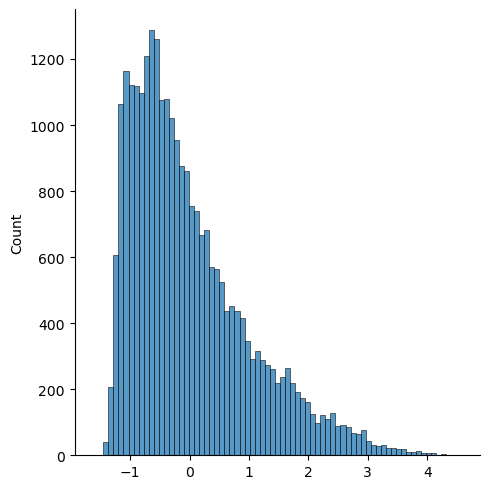

In [34]:
sns.displot(data=z_scores_THusers, kind = 'hist')
#Observations:
##The distribution of z-scores is positively skewed

In [35]:
#Filtering data to remove data with z-score > 2
df_telemed_clean = df_telemed_clean.loc[z_scores_THusers <= 2]
df_telemed_clean.shape

(25471, 13)

In [36]:
#Filtering data again to Maryland vs National
df_telemed_clean_md = df_telemed_clean[(df_telemed_clean['Bene_Geo_Desc'] == 'Maryland')].reset_index(drop = True)
df_telemed_clean_nat = df_telemed_clean[(df_telemed_clean['Bene_Geo_Desc'] == 'National')].reset_index(drop = True)

In [37]:
df_telemed_clean_md.shape

(424, 13)

In [38]:
df_telemed_clean_nat.shape

(2484, 13)

In [39]:
#Exporting cleaned data to output folder
df_telemed_clean_md.to_csv('./output_data/df_telemed_clean_md.csv')
df_telemed_clean_nat.to_csv('./output_data/df_telemed_clean_nat.csv')

## NOTEBOOK END